In [1]:
#Plot the loss by model - June 2024 
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
ls -l /home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/CCIstrat*/

/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/2023-11-07/CCIstrat14-42-52/:
total 2328
-rw-r--r-- 1 epauthen lpo 388340 Nov  8  2023 Chloro_map_2017-01.png
drwxr-xr-x 2 epauthen lpo  24576 Nov  8  2023 Chloro_pred/
-rw-r--r-- 1 epauthen lpo  29368 Nov  8  2023 Loss.png
-rw-r--r-- 1 epauthen lpo   1399 Nov  8  2023 main.log
-rw-r--r-- 1 epauthen lpo 255689 Nov  8  2023 Mean_Median.png
-rw-r--r-- 1 epauthen lpo     80 Nov  8  2023 Metrics.csv
-rw-r--r-- 1 epauthen lpo 400071 Nov  8  2023 model.pt
-rw-r--r-- 1 epauthen lpo  10260 Nov  8  2023 pred_mean.nc
-rw-r--r-- 1 epauthen lpo  11376 Nov  8  2023 pred_median.nc
-rw-r--r-- 1 epauthen lpo   2528 Nov  8  2023 train_loss.npy
-rw-r--r-- 1 epauthen lpo  12663 Nov  8  2023 Train_valid_time.png
-rw-r--r-- 1 epauthen lpo   2528 Nov  8  2023 valid_loss.npy

/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/2023-11-07/CCIstrat15-09-12/:
total 2328
-rw-r--r-- 1 epauthen lpo 386776 Nov  8  2023 Chloro_map_2017-01.png
drwx

In [16]:
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/CCIstrat*/"
list_CCI = glob.glob(log, recursive = True)
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/GCMEMSstrat*/"
list_GCMEMS = glob.glob(log, recursive = True)
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/GSMstrat*/"
list_GSM = glob.glob(log, recursive = True)

nmodel = np.arange(len(list_CCI))

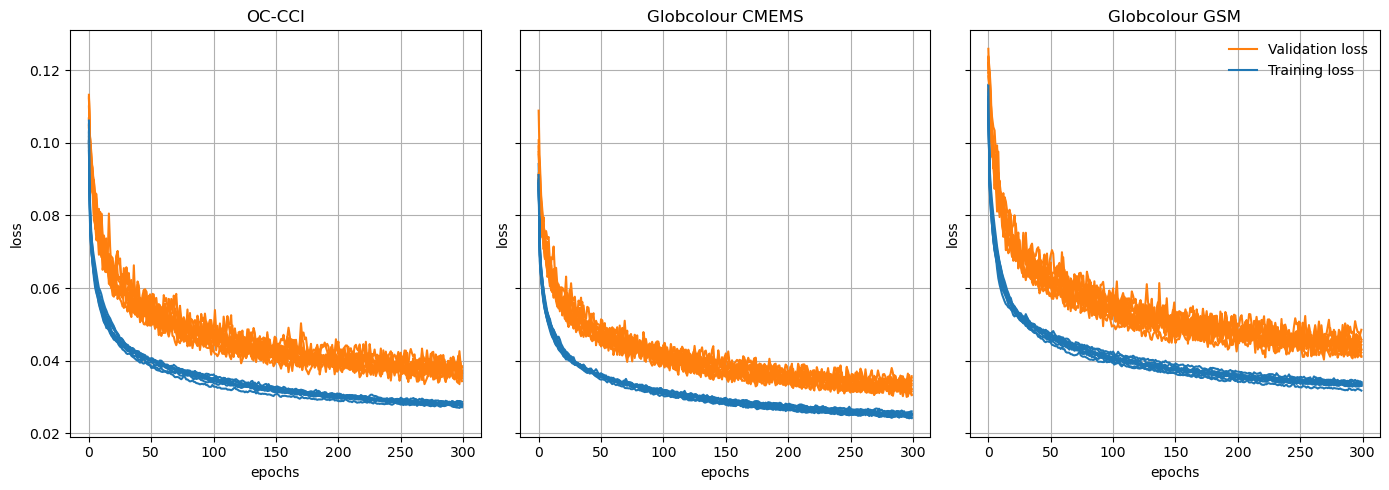

In [24]:
tt = ['OC-CCI','Globcolour CMEMS','Globcolour GSM']
fig,ax = plt.subplots(1, 3, figsize=(14, 5),sharey = True, tight_layout=True)
# Loop over the models
for k,list_model in enumerate([list_CCI,list_GCMEMS,list_GSM]):
    for i, model in enumerate(nmodel):
        # Load the validation and training loss data
        val = np.load(list_model[i] + 'valid_loss.npy')
        tra = np.load(list_model[i] + 'train_loss.npy')

        # Plot the data, adding labels only for the first iteration
        if i == 0:
            ax[k].plot(val, label='Validation loss', color='tab:orange')
            ax[k].plot(tra, label='Training loss', color='tab:blue')
        else:
            ax[k].plot(val, color='tab:orange')
            ax[k].plot(tra, color='tab:blue')

    # Add the legend to the plot
    ax[k].set_title(tt[k])
    ax[k].grid()
    ax[k].set_xlabel('epochs')
    ax[k].set_ylabel('loss')
plt.legend(frameon=False)

# Display the plot
plt.savefig('Figure_GRL/FigSI_loss.png', bbox_inches='tight')